In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score


In [3]:
df = pd.read_csv('/content/FedCycleData.csv')

In [4]:
df.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,...,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,TotalMensesScore,MeanBleedingIntensity,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding
0,nfp8122,1,0,1,0,29,27.33,17,12,12,...,3,3,2,1,1,10,9.04,5,1,0
1,nfp8122,2,0,1,0,27,,15,12,13,...,3,3,2,1,1,10,,6,1,0
2,nfp8122,3,0,1,0,29,,15,14,,...,3,3,2,1,1,10,,5,1,0
3,nfp8122,4,0,1,0,27,,15,12,13,...,3,3,3,2,1,12,,3,0,0
4,nfp8122,5,0,1,0,28,,16,12,12,...,3,3,2,2,1,11,,5,1,0


In [5]:
df.apply(pd.isnull).sum()

ClientID                      0
CycleNumber                   0
Group                         0
CycleWithPeakorNot            0
ReproductiveCategory          0
LengthofCycle                 0
MeanCycleLength               0
EstimatedDayofOvulation       0
LengthofLutealPhase           0
FirstDayofHigh                0
TotalNumberofHighDays         0
TotalHighPostPeak             0
TotalNumberofPeakDays         0
TotalDaysofFertility          0
TotalFertilityFormula         0
LengthofMenses                0
MeanMensesLength              0
MensesScoreDayOne             0
MensesScoreDayTwo             0
MensesScoreDayThree           0
MensesScoreDayFour            0
MensesScoreDayFive            0
TotalMensesScore              0
MeanBleedingIntensity         0
NumberofDaysofIntercourse     0
IntercourseInFertileWindow    0
UnusualBleeding               0
dtype: int64

In [6]:
df1=df.reset_index()['LengthofCycle']

In [7]:
df1


0       29
1       27
2       29
3       27
4       28
        ..
1660    29
1661    28
1662    28
1663    40
1664    24
Name: LengthofCycle, Length: 1665, dtype: int64

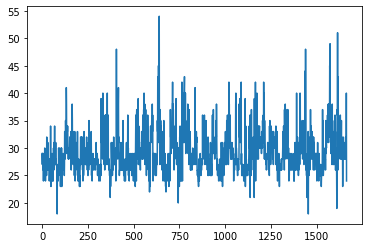

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
training_size,test_size

(1082, 583)

In [12]:
print(df1)

[[0.30555556]
 [0.25      ]
 [0.30555556]
 ...
 [0.27777778]
 [0.61111111]
 [0.16666667]]


In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(len(X_test))

482


In [15]:
print(X_train.shape), print(y_train.shape)


(981, 100)
(981,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(482, 100)
(482,)


(None, None)

In [17]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50)) 
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)


Epoch 1/200
16/16 [==============================] - 13s 319ms/step - loss: 0.0342 - val_loss: 0.0172
Epoch 2/200
16/16 [==============================] - 5s 294ms/step - loss: 0.0129 - val_loss: 0.0106
Epoch 3/200
16/16 [==============================] - 3s 217ms/step - loss: 0.0108 - val_loss: 0.0106
Epoch 4/200
16/16 [==============================] - 3s 219ms/step - loss: 0.0105 - val_loss: 0.0106
Epoch 5/200
16/16 [==============================] - 5s 319ms/step - loss: 0.0104 - val_loss: 0.0107
Epoch 6/200
16/16 [==============================] - 4s 223ms/step - loss: 0.0102 - val_loss: 0.0104
Epoch 7/200
16/16 [==============================] - 3s 220ms/step - loss: 0.0103 - val_loss: 0.0102
Epoch 8/200
16/16 [==============================] - 4s 243ms/step - loss: 0.0101 - val_loss: 0.0101
Epoch 9/200
16/16 [==============================] - 4s 260ms/step - loss: 0.0099 - val_loss: 0.0101
Epoch 10/200
16/16 [==============================] - 3s 216ms/step - loss: 0.0097 - val_l

In [22]:
import tensorflow as tf


In [23]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 1s 70ms/step


In [24]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

28.684090743279683

In [26]:
math.sqrt(mean_squared_error(ytest,test_predict))

28.907862157243414

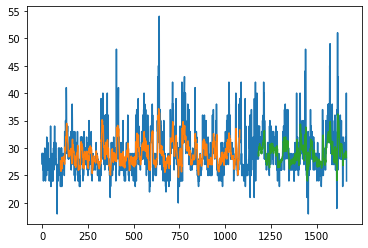

In [27]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 242)

In [29]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [30]:
from numpy import array

lst_output=[]
n_steps=241
i=0
while(i<8):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("Length of cycle".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} Predicted Length of cycle {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    


Length of cycle
0 Predicted Length of cycle [[0.31014636]]
Length of cycle
1 Predicted Length of cycle [[0.30036607]]
Length of cycle
2 Predicted Length of cycle [[0.29551983]]
Length of cycle
3 Predicted Length of cycle [[0.2906331]]
Length of cycle
4 Predicted Length of cycle [[0.28505152]]
Length of cycle
5 Predicted Length of cycle [[0.27925578]]
Length of cycle
6 Predicted Length of cycle [[0.2739173]]
Length of cycle
7 Predicted Length of cycle [[0.26962417]]


In [31]:
day_new=np.arange(1,242)
day_pred=np.arange(242,272)


In [32]:
new_output=[]
new_output=scaler.inverse_transform(lst_output)
print(new_output)

[[29.16526902]
 [28.81317866]
 [28.63871384]
 [28.46279204]
 [28.26185489]
 [28.05320799]
 [27.86102235]
 [27.70647025]]


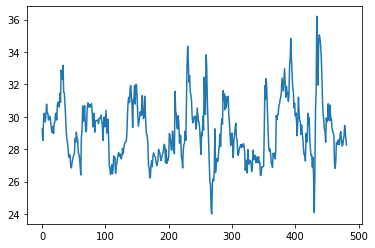

In [33]:
plt.plot(test_predict)

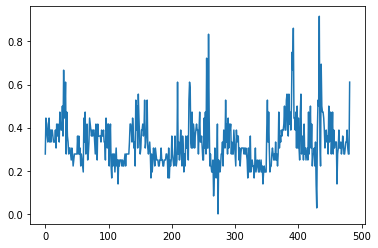

In [34]:
plt.plot(ytest)

In [35]:
test_predict

array([[29.231564],
       [28.535284],
       [29.605476],
       [30.210442],
       [30.051832],
       [29.680798],
       [30.162394],
       [30.778357],
       [30.2168  ],
       [30.217161],
       [29.790327],
       [29.918388],
       [30.04037 ],
       [29.859123],
       [29.466602],
       [29.186382],
       [29.012993],
       [29.412521],
       [28.969728],
       [29.619183],
       [29.642363],
       [30.115135],
       [30.222263],
       [29.793428],
       [30.711674],
       [30.904612],
       [30.734047],
       [30.600834],
       [31.446716],
       [30.894674],
       [32.879078],
       [32.453117],
       [32.2964  ],
       [33.172794],
       [31.497639],
       [31.469877],
       [30.824701],
       [30.075493],
       [29.113081],
       [28.629404],
       [28.386948],
       [28.017889],
       [27.50147 ],
       [27.668316],
       [27.610634],
       [27.003983],
       [26.838299],
       [27.104725],
       [27.342743],
       [27.509125],


In [36]:
ytest

array([0.27777778, 0.44444444, 0.41666667, 0.36111111, 0.33333333,
       0.41666667, 0.44444444, 0.33333333, 0.38888889, 0.33333333,
       0.38888889, 0.38888889, 0.36111111, 0.33333333, 0.33333333,
       0.33333333, 0.38888889, 0.30555556, 0.41666667, 0.36111111,
       0.41666667, 0.38888889, 0.33333333, 0.47222222, 0.41666667,
       0.38888889, 0.38888889, 0.5       , 0.36111111, 0.66666667,
       0.44444444, 0.47222222, 0.61111111, 0.27777778, 0.47222222,
       0.36111111, 0.33333333, 0.27777778, 0.30555556, 0.30555556,
       0.27777778, 0.25      , 0.30555556, 0.27777778, 0.22222222,
       0.25      , 0.27777778, 0.27777778, 0.27777778, 0.27777778,
       0.27777778, 0.36111111, 0.27777778, 0.36111111, 0.27777778,
       0.30555556, 0.22222222, 0.27777778, 0.25      , 0.22222222,
       0.19444444, 0.44444444, 0.33333333, 0.47222222, 0.27777778,
       0.33333333, 0.41666667, 0.25      , 0.27777778, 0.33333333,
       0.44444444, 0.41666667, 0.38888889, 0.36111111, 0.38888

In [38]:
filename='EVEMODEL.h5'
model.save(filename)